In [ ]:
#Exploratory Data Analysis

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data set and save
penguins = pd.read_csv("penguins.csv")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Basic understanding of the data set

In [5]:
#Q. What's the dimension of the data set?
penguins.shape

(344, 8)

In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
# Q. Do we only have 3 different species from the data set?
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [9]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [10]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
penguins.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [12]:
penguins.sex.value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [13]:
penguins.year.value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

In [14]:
## Missing Values

In [15]:
penguins.isna() #tells whether each data is NA (not available) or not

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [16]:
# Q. Then how many NA values does the data set have?

In [17]:
penguins.isna().sum() #number of NA values from each column

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [18]:
# Are we going to drop the NA values? Or Do we impute some value?
# Let's assume that we do not have that many NA values so it is okay to drop the
# rows containing NA values.


In [20]:
penguins.dropna(how = "any")
# "any": if ANY of the column values is NA from a row, then drop it from the data set


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
penguins.dropna(how = "all")
# you drop a row if ALL column values are NA.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [22]:
penguins = penguins.dropna(how = "any")

In [23]:
penguins.shape

(333, 8)

In [24]:
# Let us use visualization to find associations among different variables

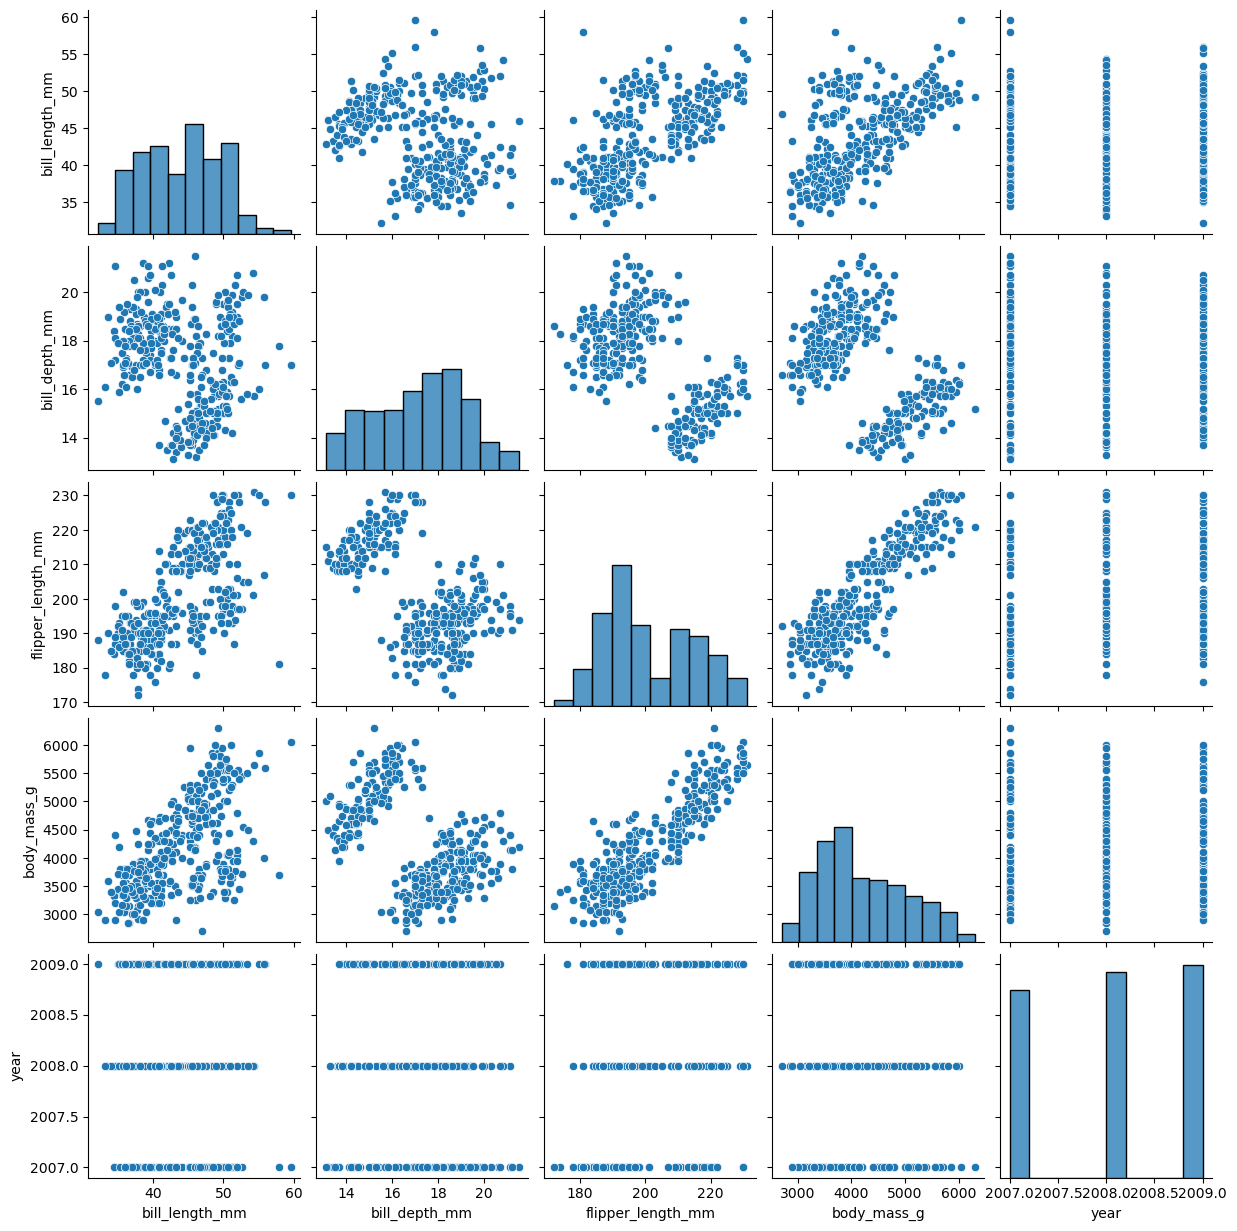

In [25]:
sns.pairplot(penguins) #scatter plot of all the comnibations of
# numerical variables

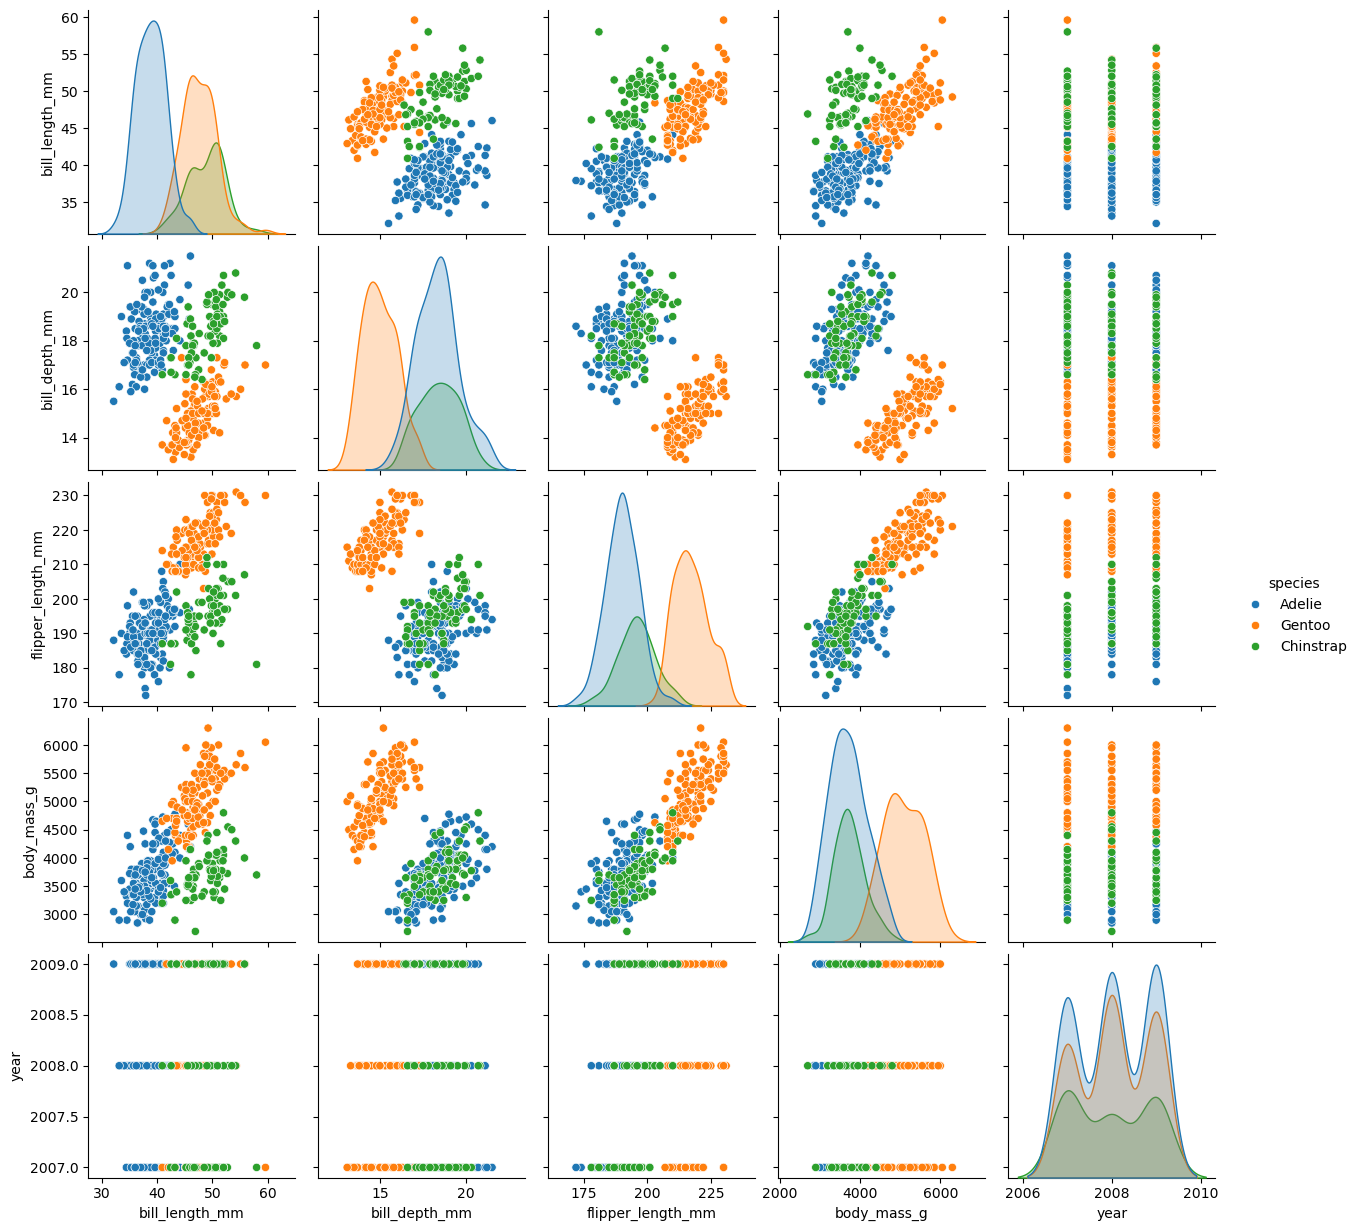

In [26]:
sns.pairplot(penguins, hue = "species")

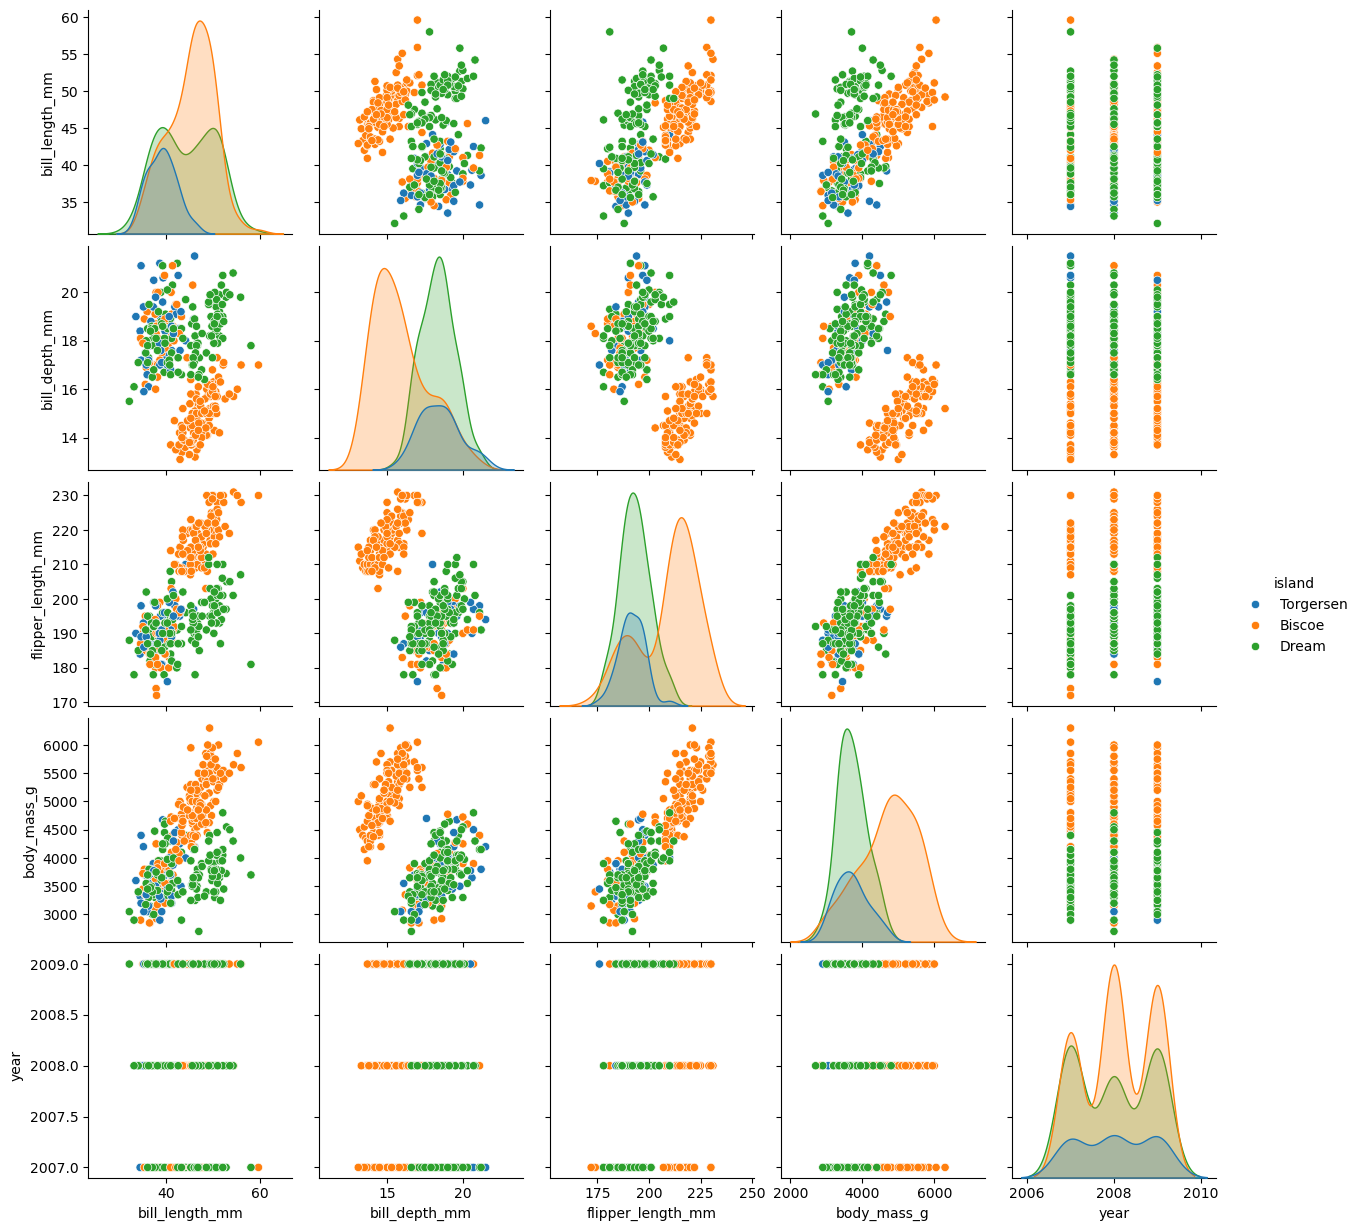

In [27]:
sns.pairplot(penguins, hue = "island")

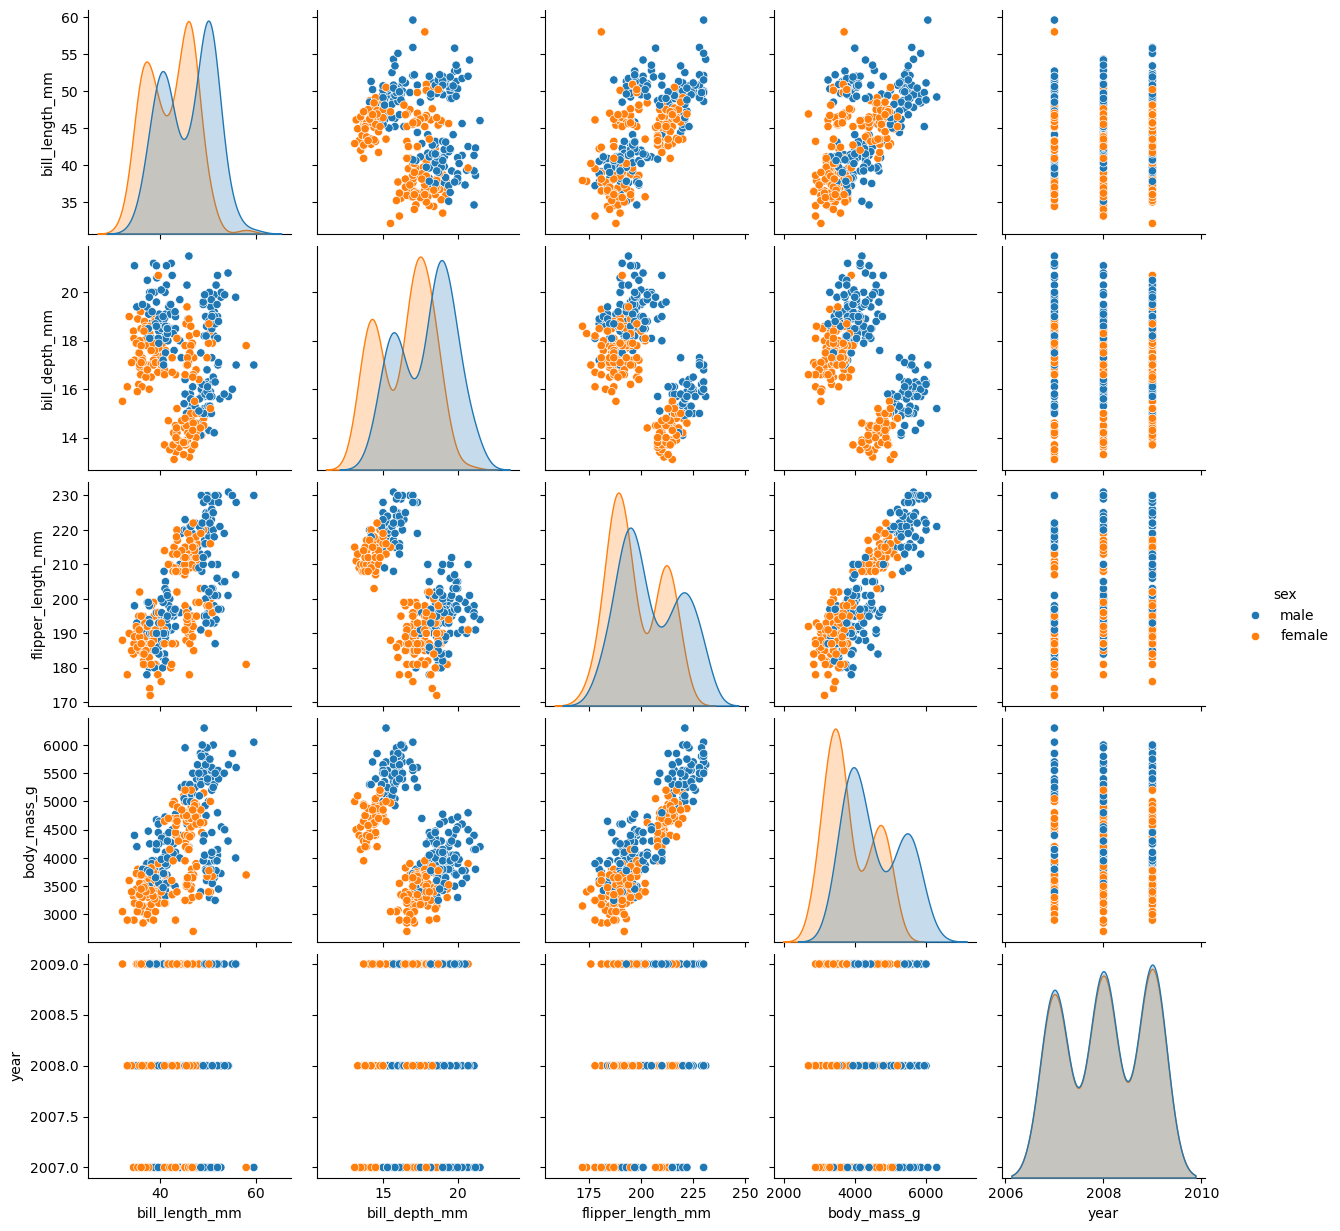

In [28]:
sns.pairplot(penguins, hue = "sex")

In [29]:
# After observing these pairplots, there are some questions that we might be
# interested in answering:

In [ ]:
# 1. Association between body mass and flipper length
# 2. Association between species and island?
# 3. Association between bill depth and bill length across different species?

In [30]:
# Heatmap Using Correlation: Degree of Linear Relationship
# Between two variables

# correlation is always between -1 and 1, 1 is (perfect) positive correlation, 
# -1 is (perfect) negative correlation, and 0 is no correlation

In [33]:
penguins.select_dtypes('number').corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


In [34]:
penguins_corr = penguins.select_dtypes('number').corr()

<Axes: >

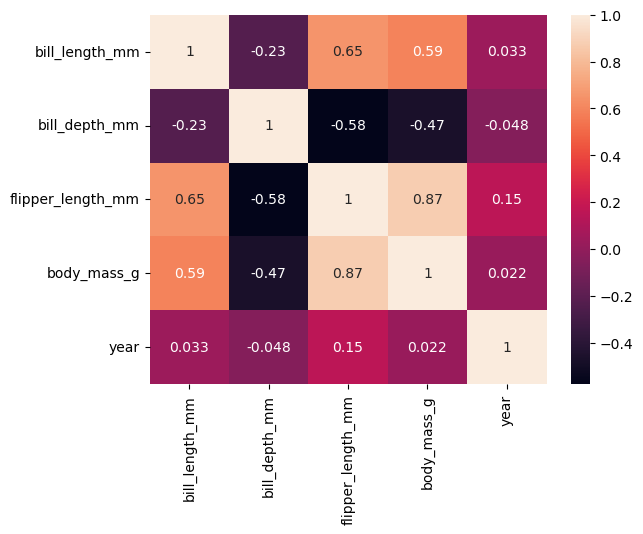

In [35]:
sns.heatmap(penguins_corr, annot = True)

In [36]:
# year column is not (linearly) correlated with any of the numerical variables.

In [37]:
# Let us answer the second question: contingency table

# Contingency table: table in a matrix format that displays the (multivariate)
# frequency distribution of the variables.

In [38]:
pd.crosstab(penguins['species'], penguins['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


In [ ]:
# - Torgerson island only has Adelie penguins
# - Gentoo penguins only live in Biscoe island, whereas Chinstrap penguins only live
# in Dream island
# - Adelie penguins live across three different islands. So then you might wonder
# if their habitat affects their physical measurements

In [39]:
# Exercise

In [40]:
iris = pd.read_csv("IRIS.csv")

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

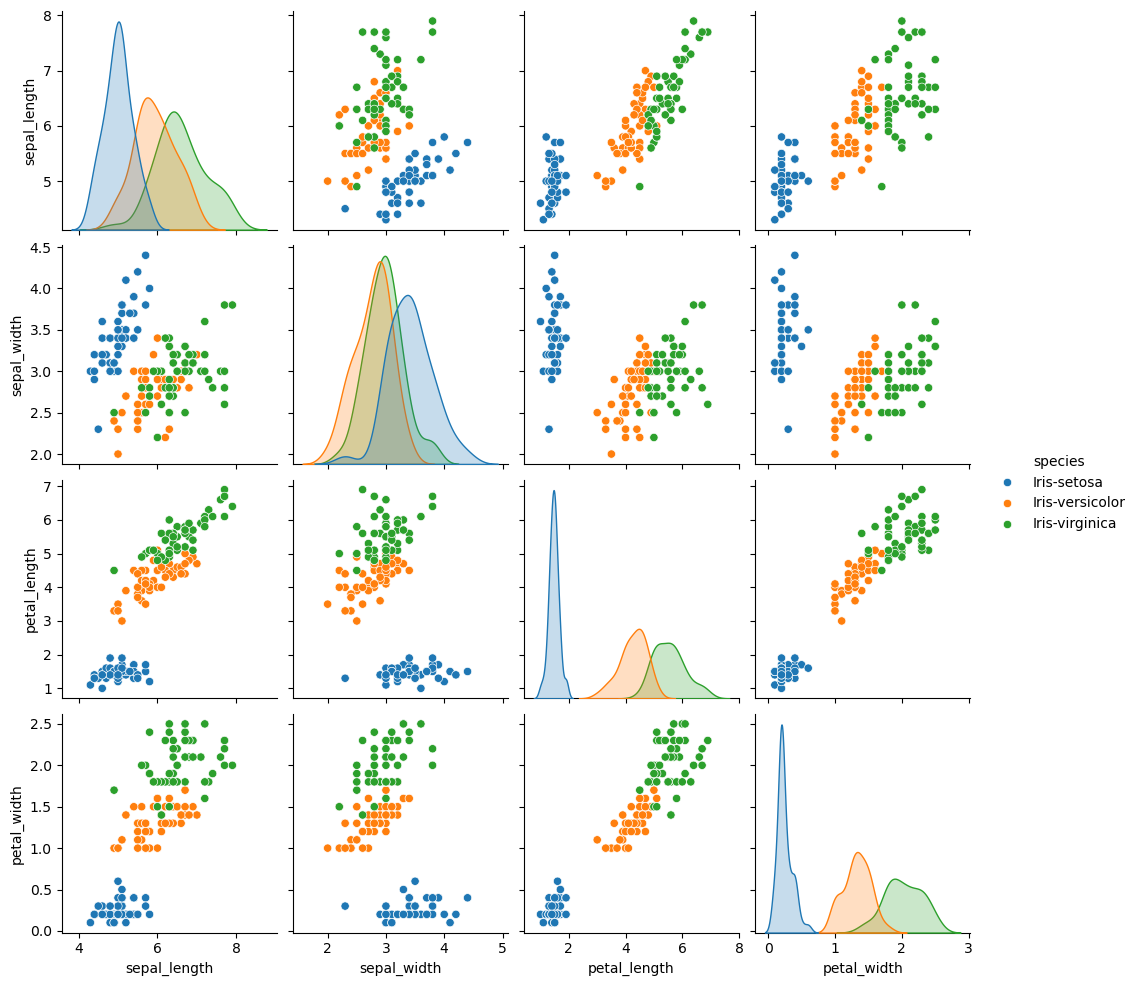

In [43]:
sns.pairplot(iris, hue = "species")

In [45]:
# Correlation check
iris_corr = iris.select_dtypes('number').corr()

<Axes: >

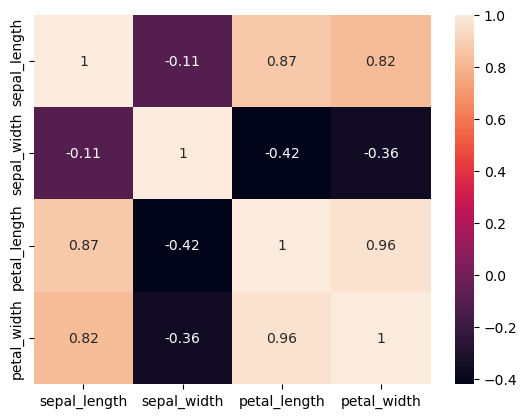

In [46]:
sns.heatmap(iris_corr, annot = True)

<Axes: xlabel='species', ylabel='petal_width'>

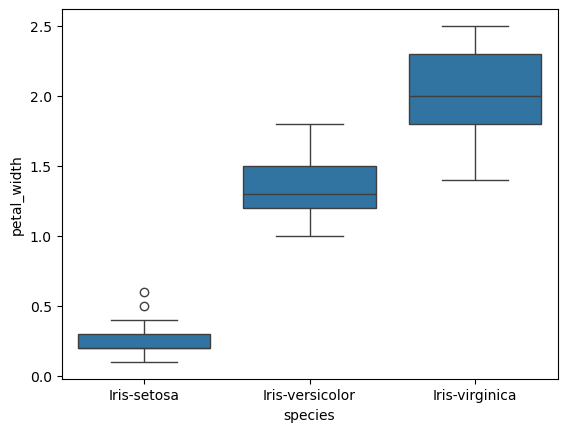

In [47]:
# Boxplot of petal width across different species

sns.boxplot(data = iris, x = "species", y = "petal_width")

In [48]:
# Q. For Adelie penguins, do different habitats (island) affect 
# their physical conditions?

In [51]:
adelie = penguins[penguins['species'] == "Adelie"]

In [52]:
adelie.species.unique()

array(['Adelie'], dtype=object)

In [53]:
# let us obtain mean/standard deviation of all the numerical measures of Adelie
# penguins across different islands
stat_list = ["mean", "std"]
adelie.groupby("island")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm",
                          "body_mass_g"]].agg(stat_list)

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
island                                                                         
Biscoe         38.975000  2.480916     18.370455  1.188820        188.795455   
Dream          38.520000  2.484276     18.240000  1.140598        189.927273   
Torgersen      39.038298  3.028097     18.451064  1.346472        191.531915   

                     body_mass_g              
                std         mean         std  
island                                        
Biscoe     6.729247  3709.659091  487.733722  
Dream      6.480325  3701.363636  448.774519  
Torgersen  6.220062  3708.510638  451.846351

<Axes: xlabel='island', ylabel='bill_depth_mm'>

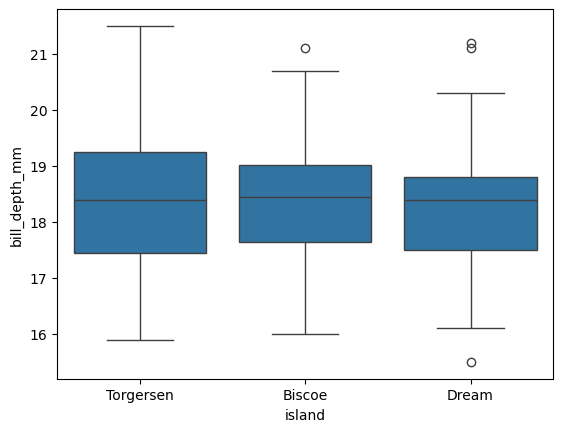

In [54]:
sns.boxplot(data = adelie, x = "island", y="bill_depth_mm")

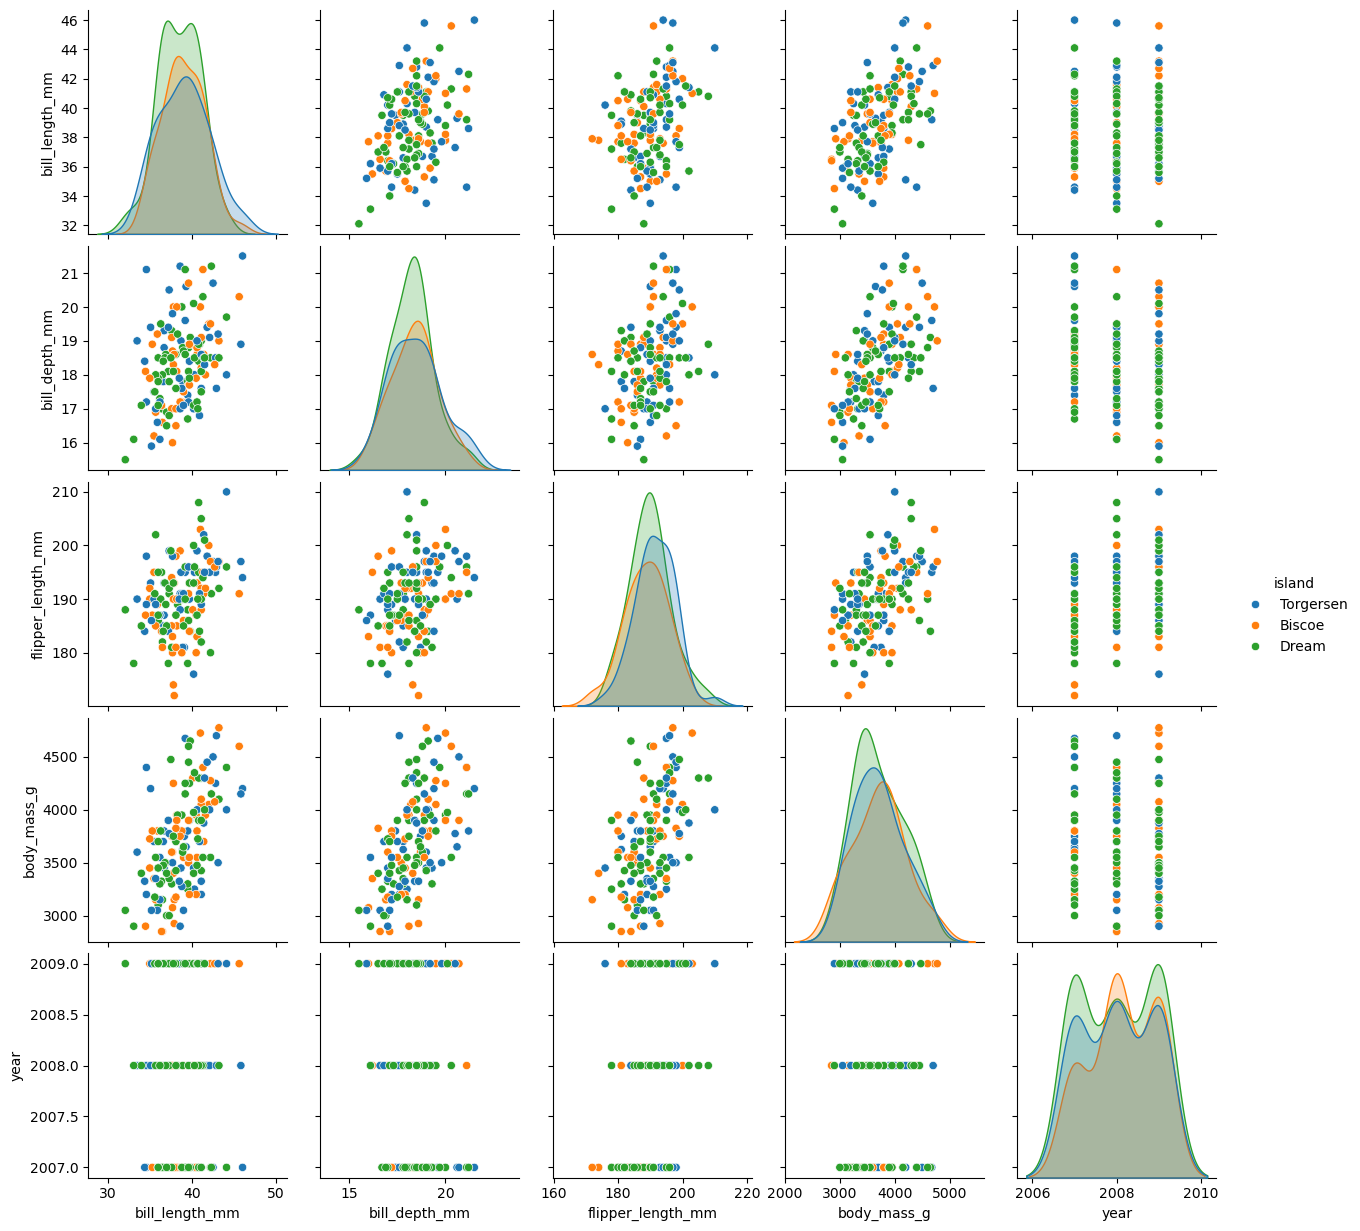

In [55]:
sns.pairplot(adelie, hue = "island")

In [56]:
# Tentative conclusion: from the summary statistics and the pairplot, we can assume
# that there is no significant difference in physical measurements of adelie penguins
# across three different islands.

In [ ]:
# (Brief) Introduction to Decision Tree

# Decision Tree helps you extract the most important features of the data set
# for classification

In [58]:
from sklearn import tree

In [59]:
y = penguins.iloc[:,0] # species
X = penguins.iloc[:, 2:6] # numerical variables

penguins_tree = tree.DecisionTreeClassifier(max_depth = 2)


In [61]:
penguins_tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
feature_names = X.columns.tolist() 
tree.plot_tree(penguins_tree, feature_names = feature_names, 
class_names = penguins_tree.classes_, filled = True)

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144.0, 63.0, 1.0]\nclass = Adelie'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.148\nsamples = 63\nvalue = [4, 58, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'bill_depth_mm <= 17.65\ngini = 0.107\nsamples = 125\nvalue = [2, 5, 118]\nclass = Gentoo'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]\nclass = Chinstrap')]

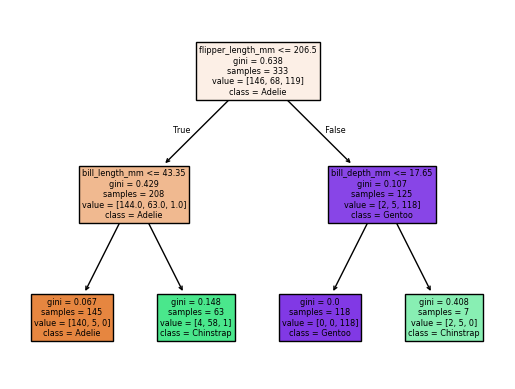

In [63]:
feature_names = X.columns.tolist()

tree.plot_tree(penguins_tree, feature_names=feature_names, 
               class_names=penguins_tree.classes_, filled=True)

In [64]:
# You can use the trained decision tree model
# to classify "new" penguins 

# bill length, bill depth, flipper length, body mass

new_penguins = [[40, 15, 200, 4000],
                [40, 15, 210, 4500],
                [45, 20, 200, 4800]]

In [65]:
penguins_tree.predict(new_penguins)

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [66]:
# linear regression on body mass versus flipper length

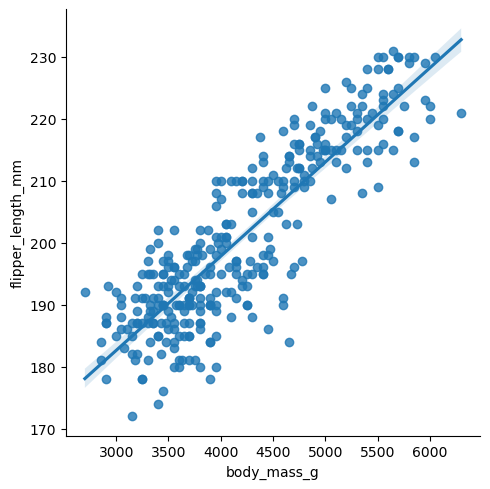

In [67]:
sns.lmplot(data = penguins, x = "body_mass_g", y = "flipper_length_mm")

In [68]:
# Let's run some linear regression:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'flipper_length_mm' and 'body_mass_g' variables from our data set
y = penguins["flipper_length_mm"]
x = penguins["body_mass_g"]
X = sm.add_constant(x) # If you do not add a constant, linear fit will find the best line $y = ax$, which passes
# through (0,0), that fits the data set (instead of $y = ax + b$ for some $a$ and $b$)
penguins_model1 = sm.OLS(y, X)
fit1 = penguins_model1.fit()

# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.13e-105
Time:                        16:42:17   Log-Likelihood:                -1112.1
No. Observations:                 333   AIC:                             2228.
Df Residuals:                     331   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.0396      1.999     68.562      0.000     133.108     140.972
body_mass_g     0.0152      0.000     32.562      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.696
Skew:                          -0.474   Prob(JB):                      0.00175
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Exercise continued

In [71]:
# generate summary statistics (mean/std) for all the numerical variables across
# different species

iris.groupby("species")[["sepal_length", "sepal_width", "petal_length", 
                          "petal_width"]].agg(["mean", "std"])

sepal_length           sepal_width           petal_length  \
                        mean       std        mean       std         mean   
species                                                                     
Iris-setosa            5.006  0.352490       3.418  0.381024        1.464   
Iris-versicolor        5.936  0.516171       2.770  0.313798        4.260   
Iris-virginica         6.588  0.635880       2.974  0.322497        5.552   

                          petal_width            
                      std        mean       std  
species                                          
Iris-setosa      0.173511       0.244  0.107210  
Iris-versicolor  0.469911       1.326  0.197753  
Iris-virginica   0.551895       2.026  0.274650

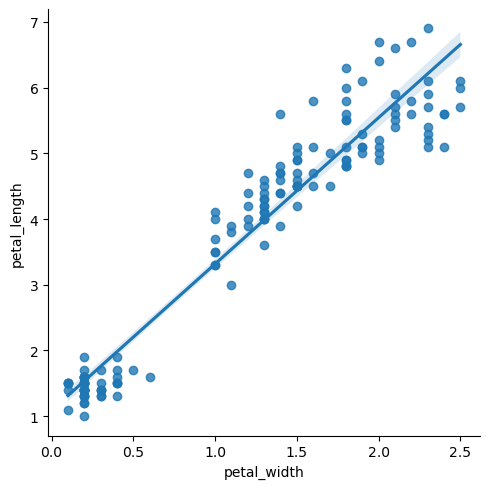

In [72]:
# linear regression on petal width vs petal length

sns.lmplot(data = iris, x = "petal_width", y="petal_length")

In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'Petal.Width' and 'Petal.Length' variables from our data set
y = iris["petal_length"]
x = iris["petal_width"]
X = sm.add_constant(x)

iris_model1 = sm.OLS(y, X)
fit1 = iris_model1.fit()

# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           5.78e-86
Time:                        16:56:02   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0906      0.073     14.951      0.000       0.946       1.235
petal_width     2.2259      0.051     43.320      0.000       2.124       2.327
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.852
Skew:                           0.210   Prob(JB):                        0.396
Kurtosis:                       3.347   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
from sklearn import tree

X = iris.select_dtypes('number')
y = iris.loc[:,"species"] #species
model2 = tree.DecisionTreeClassifier(max_depth=2)
model2 = model2.fit(X, y)

# Get the feature names
feature_names = X.columns.tolist()

[Text(0.4, 0.8333333333333334, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = Iris-virginica')]

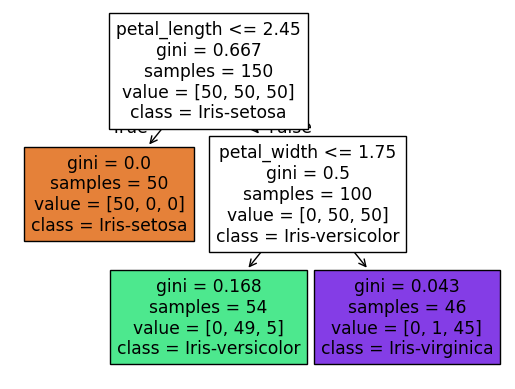

In [76]:
tree.plot_tree(model2, feature_names=feature_names, 
               class_names=model2.classes_, filled=True)